In [55]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora

from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

/usr/local/Caskroom/miniconda/base/envs/datascience/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
import numpy as np 
import pandas as pd
import re
import os 
import random
import pickle
import scipy
import mathutils
import gensim


In [49]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

/usr/local/Caskroom/miniconda/base/envs/datascience/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [30]:
import re
from wordcloud import WordCloud
import gensim.corpora as corpora

In [ ]:
import spacy
from spacy.util import minibatch, compounding


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
def input_and_clean(filename):
    
    '''
    Looks at rating values and assigns eithe positive or negative, will be used to test and train
    '''
    
    df = pd.read_csv(filename)
    
    ls = []

    for index, row in df.iterrows():
        if row['rating'] >= 7:
            label = 'pos'
        elif row['rating'] <= 4:
            label = 'neg'
            
        ls.append(label)
        
    df['label'] = ls 
    
    ls2 = []
    
    for index, row in df.iterrows():
        clean = row['review'].strip()
        ls2.append(clean)
        

    df['review'] = ls2
    
    
    ls3 = []
    
    for index, row in df.iterrows():
        if row['rating'] >= 7:
            sentiment = 1
        elif row['rating'] <= 4:
            sentiment = 0
            
        ls3.append(sentiment)
        
    df['sentiment'] = ls3
            
    
    return df 
    
    
    

In [10]:
df_dota = input_and_clean('MetacriticReviews_DOTA2.csv')

df_valorant = input_and_clean('MetacriticReviews_VALORANT PC.csv')


In [11]:
df_dota.head()

,Unnamed: 0,user,date,rating,review,label,sentiment
0,2,Anonymous,19-Feb-14,9,Simply irresistible and addictive as hell.,pos,1
1,69,Anonymous,01-Sep-13,9,"Unforgiving from the get-go, but a landmark in...",pos,1
2,142,Anonymous,15-Aug-17,9,And this dichotomy is perhaps the best descrip...,pos,1
3,234,Anonymous,06-Feb-21,10,"I wasted a lot time of my life, DOTA 2 is extr...",pos,1
4,236,Anonymous,12-Dec-20,10,The best game ever. Best in its genre. Most ba...,pos,1


In [12]:
df_dota = df_dota.drop(columns=['user', 'Unnamed: 0', 'date','label','sentiment'], axis=1)

In [13]:
df_dota.head()

,rating,review
0,9,Simply irresistible and addictive as hell.
1,9,"Unforgiving from the get-go, but a landmark in..."
2,9,And this dichotomy is perhaps the best descrip...
3,10,"I wasted a lot time of my life, DOTA 2 is extr..."
4,10,The best game ever. Best in its genre. Most ba...


In [15]:
df_dota['text_processed'] = \
df_dota['review'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
df_dota['text_processed'] = \
df_dota['text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
df_dota['text_processed'].head()

0            simply irresistible and addictive as hell
1    unforgiving from the get-go but a landmark in ...
2    and this dichotomy is perhaps the best descrip...
3    i wasted a lot time of my life dota 2 is extre...
4    the best game ever best in its genre most bala...
Name: text_processed, dtype: object

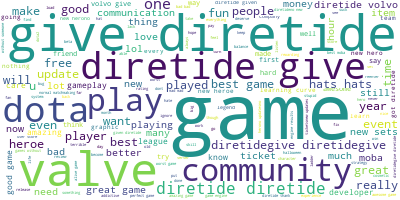

In [20]:
# Join the different processed titles together.
long_string = ','.join(list(df_dota['text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [27]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df_dota['text_processed'].tolist()


data_words = list(sent_to_words(data))# remove stop words

data_words = remove_stopwords(data_words)

print(data_words[:3][0][:30])

['simply', 'irresistible', 'addictive', 'hell']


In [29]:
data_words

[['simply', 'irresistible', 'addictive', 'hell'],
 ['unforgiving',
  'get',
  'go',
  'landmark',
  'competitive',
  'multiplayer',
  'design',
  'oct'],
 ['dichotomy',
  'perhaps',
  'best',
  'descriptor',
  'attach',
  'dota',
  'frequently',
  'game',
  'occupies',
  'two',
  'opposite',
  'spaces',
  'simultaneously',
  'best',
  'game',
  'also',
  'worst',
  'game',
  'game',
  'ever',
  'made',
  'miserable',
  'dota',
  'game',
  'made',
  'feel',
  'consistently',
  'rewarded',
  'time',
  'consistently',
  'wonderfully',
  'connected',
  'friends',
  'play'],
 ['wasted',
  'lot',
  'time',
  'life',
  'dota',
  'extremely',
  'addictive',
  'playing',
  'first',
  'time',
  'drenaid',
  'slowly'],
 ['best', 'game', 'ever', 'best', 'genre', 'balanced', 'best', 'free', 'play'],
 ['dota',
  'game',
  'universe',
  'sorts',
  'parallel',
  'universes',
  'game',
  'gives',
  'knowledge',
  'beyond',
  'edges',
  'knowledge',
  'universe'],
 ['get',
  'past',
  'learning',
  'cur

In [51]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


/usr/local/Caskroom/miniconda/base/envs/datascience/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
from pprint import pprint# number of topics
num_topics = 7# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

/usr/local/Caskroom/miniconda/base/envs/datascience/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.052*"game" + 0.034*"diretide" + 0.026*"volvo" + 0.022*"new" + '
  '0.022*"give" + 0.020*"diretidegive" + 0.016*"valve" + 0.014*"community" + '
  '0.011*"great" + 0.010*"dota"'),
 (1,
  '0.050*"game" + 0.029*"hats" + 0.015*"play" + 0.012*"bad" + 0.012*"valve" + '
  '0.008*"diretide" + 0.008*"dota" + 0.008*"get" + 0.007*"better" + '
  '0.006*"time"'),
 (2,
  '0.042*"game" + 0.021*"diretide" + 0.016*"dota" + 0.013*"best" + '
  '0.013*"valve" + 0.011*"want" + 0.011*"community" + 0.010*"play" + '
  '0.009*"ever" + 0.009*"new"'),
 (3,
  '0.032*"game" + 0.029*"dota" + 0.016*"valve" + 0.012*"new" + 0.012*"play" + '
  '0.010*"best" + 0.009*"community" + 0.009*"one" + 0.008*"great" + '
  '0.007*"give"'),
 (4,
  '0.164*"diretide" + 0.093*"give" + 0.031*"game" + 0.025*"valve" + '
  '0.007*"games" + 0.006*"volvo" + 0.006*"awesome" + 0.005*"score" + '
  '0.005*"gaem" + 0.005*"new"'),
 (5,
  '0.079*"game" + 0.025*"dota" + 0.021*"diretide" + 0.014*"best" + '
  '0.012*"good" + 0.011*"got" + 0

In [59]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/Caskroom/miniconda/base/envs/datascience/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/usr/local/Caskroom/miniconda/base/envs/datascience/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8280,"game, diretide, volvo, new, give, diretidegive...","[simply, irresistible, addictive, hell]"
1,1,0.0,0.9043,"game, diretide, volvo, new, give, diretidegive...","[unforgiving, get, go, landmark, competitive, ..."
2,2,6.0,0.9754,"game, play, diretide, best, dota, valve, heroe...","[dichotomy, perhaps, good, descriptor, attach,..."
3,3,2.0,0.9339,"game, diretide, dota, best, valve, want, commu...","[waste, lot, time, life, dota, extremely, addi..."
4,4,5.0,0.9140,"game, dota, diretide, best, good, got, valve, ...","[good, game, ever, good, genre, balance, good,..."
5,5,1.0,0.9386,"game, hats, play, bad, valve, diretide, dota, ...","[dota, game, universe, sort, parallel, univers..."
6,6,2.0,0.9669,"game, diretide, dota, best, valve, want, commu...","[get, past, game, give, good, pvp, adrenaline,..."
7,7,1.0,0.8925,"game, hats, play, bad, valve, diretide, dota, ...","[game, russian, server, bad, mother]"
8,8,2.0,0.9426,"game, diretide, dota, best, valve, want, commu...","[praise, icefrog, lord, gaben, good, game, eve..."
9,9,5.0,0.9547,"game, dota, diretide, best, good, got, valve, ...","[hrs, record, play, game, warcraft, mod, dotad..."
